In [1]:
# rishav anand 11-11-2023

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1,parser = 'auto')
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

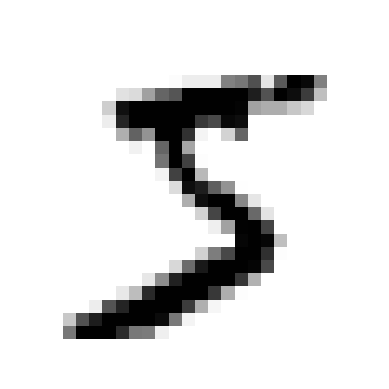

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image,cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

# Spliting Data 

In [8]:
X_train,X_test ,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Training A Binary Classifier

In [9]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measure

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype =bool)

## Cross Validation

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [16]:
# now using the confusion matrix function 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
y_train_perfect_predictions = y_train_5 
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [18]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred)) # 3530 / (3530 + 687)
print(recall_score(y_train_5,y_train_pred)) # 3530 / (3530 + 1891)

0.8370879772350012
0.6511713705958311


## f1 score 

In [19]:
# f1 score is the harmonic of precision and recall . which is 
#       2TP
#  ------------------
#    2TP + FN + FP

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)



0.7325171197343846

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [21]:
threshold = 0

In [22]:
y_some_digit_pred = (y_scores > threshold)

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve 

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

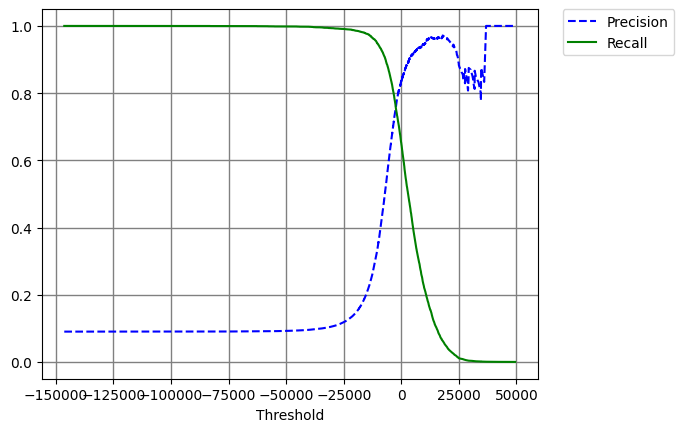

In [26]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid( which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)    
plt.show()

In [27]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

3370.0194991439566

In [28]:
y_train_pred_90 = (y_scores >=threshold_90_precision)


In [29]:
print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))

0.9000345901072293
0.4799852425751706


## ROC Curve

In [30]:
from sklearn.metrics import roc_curve 

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

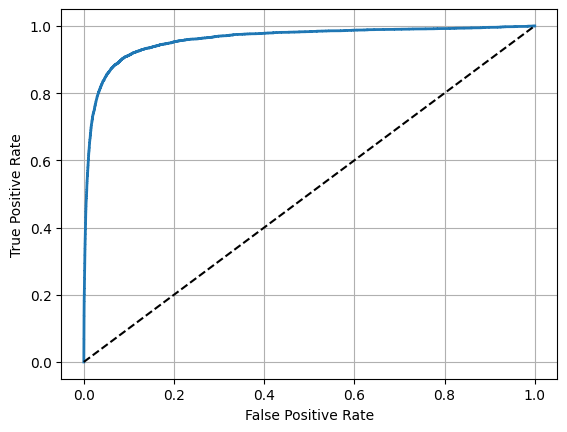

In [31]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label = label)
    plt.plot([0,1],[0,1],'k--') # dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()

plot_roc_curve(fpr,tpr)
plt.show()
    

## AUC (Area under curve)

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state =42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [34]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

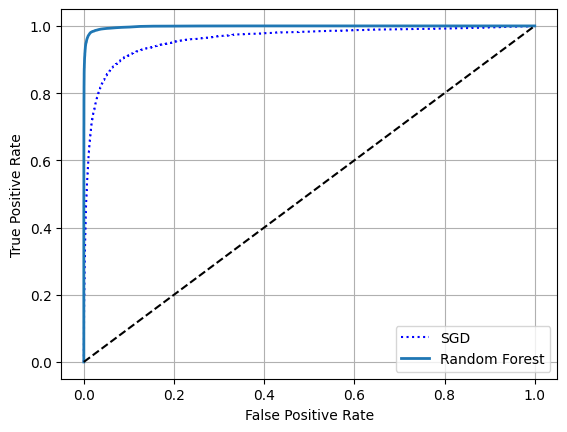

In [35]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

# Multiclass Classification

In [37]:
sgd_clf.fit(X_train,y_train) # y_train,not y_train_5
sgd_clf.predict([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype='<U1')

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [39]:
np.argmax(some_digit_scores)

3

In [40]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [41]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit ])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [44]:
forest_clf.predict_proba([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [45]:
cross_val_score(sgd_clf,X_train,y_train, cv =3 ,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

### Increasing the Accuracy 

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

# Error analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()